In [11]:
import subprocess
import pandas as pd

import shutil
import urllib.request as request
from contextlib import closing
from urllib.error import URLError
import os


import sys
import time
import urllib
import subprocess
import json

In [19]:
cfg = json.load(open('../config/test-params.json'))
cfg

{'test_url': 'https://ftp-trace.ncbi.nih.gov/1000genomes/ftp/release/20130502/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz',
 'test_file': 'ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz.tbi',
 'pop_url': 'https://ftp-trace.ncbi.nih.gov/1000genomes/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel',
 'outpath': './data/vcf'}

In [20]:
fp = get_biodata(cfg['test_url'], cfg['outpath'])

Downloading...
...35%, 73 MB, 12043 KB/s, 6 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



...55%, 114 MB, 12505 KB/s, 9 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



...70%, 145 MB, 12633 KB/s, 11 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



...86%, 175 MB, 13056 KB/s, 13 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



...100%, 204 MB, 13077 KB/s, 16 seconds passed
Unzipping


['../data/vcf/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz']

In [49]:
fp = ['../data/vcf/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz']
fp = fp[0]
filt_out_path = "../data/vcf/filtered/"
prunefp, filtered_vcf = prune_filter_vcf(fp, filt_out_path, fp.split('/')[-1])

In [50]:
filtered_vcf, prunefp

('../data/vcf/filtered/filt_ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz.vcf',
 '../data/vcf/filtered/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz.prune.in')

In [51]:
pca_out_path = '../data/pca/'
pca_file_name = make_pca(filtered_vcf, prunefp, pca_out_path, filtered_vcf.split('/')[-1])

In [52]:
pop_df = pd.read_csv('../test/integrated_call_samples_v3.20130502.ALL.panel', delimiter='\t').drop(columns=['Unnamed: 4', 'Unnamed: 5'])

In [53]:
pca_file_name

'../data/pca/filt_ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz.vcf_pca'

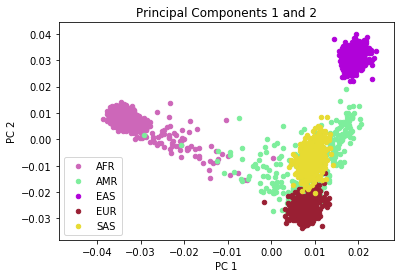

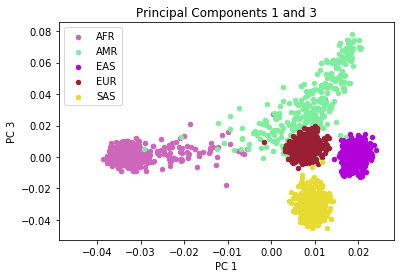

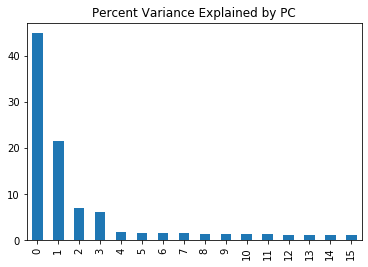

In [54]:
plot_from_pca(pca_file_name, pop_df)


In [2]:
pop_df = pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel', delimiter='\t').drop(columns=['Unnamed: 4', 'Unnamed: 5'])
pop_df.head()

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male


In [15]:


url = [("http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz")]
outpath = "./data/vcf/"

### FROM BLOG: https://blog.shichao.io/2012/10/04/progress_speed_indicator_for_urlretrieve_in_python.html
# adds download progress bar to urlretrieve
def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = int(progress_size / (1024 * duration))
    percent = int(count * block_size * 100 / total_size)
    sys.stdout.write("\r...%d%%, %d MB, %d KB/s, %d seconds passed" %
                    (percent, progress_size / (1024 * 1024), speed, duration))
    sys.stdout.flush()
###

def get_biodata(urls, outdir):
    """ Feed config file with array of urls, and directory to save at.
    """
    files_downloaded = []
    if type(urls) == list:
        for url in urls:
            files_downloaded.append(get_biofile(url, outdir))
    else:
        
        files_downloaded.append(get_biofile(urls, outdir))
    return files_downloaded

        
# in the future maybe specify number, chromosome, population, etc.
def get_biofile(url, outdir):
    """ Helper to specifically download one file from url to out directory.
    """
    filename = url.split('/')[-1]
    
    if not os.path.exists(outdir):
        os.mkdir(outdir)

    fullpath = os.path.join(outdir, filename) 

    print("Downloading...")
    urllib.request.urlretrieve(url, fullpath, reporthook) # downloads to fullpath
    
    for_check_zip = '.gz'
    if url.endswith(for_check_zip):
        print()
        print("Unzipping")
        subprocess.run(["unzip",fullpath])
        
    return fullpath        


In [4]:
url = [("http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz")]
outpath = "../data/vcf/"
# get_biodata(url, outpath)

In [48]:
def run_process(command, print_out=1, cmd_list=True):
    p = subprocess.Popen(command, shell=cmd_list, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    outputs = []
    if print_out:
        for outline in p.stdout.readlines():
#             print(outline.strip())
            outputs.append(outline.strip().decode("utf-8"))
        
    retval = p.wait()
    return outputs



def merge_vcf(file_list, directory, out_path):
    """ chrom_list = [ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz,
    ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz] # list of files to merge from directory
    """
    concat_input = ''
    num_files = len(file_list)
    out_fp = out_path + str(num_files) + '_merged.vcf'
    for file in file_list:
        concat_input = concat_input + directory + file + ' '
        
    cmd = 'bcftools concat ' + concat_input +' -O v --output ' + out_fp
    print(cmd)
    run_process(cmd)
    return out_fp

def prune_filter_vcf(fp, out_path, out_prefix):
    """ ex: fp = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
    out_path = '../data/vcf/filtered/'
    out_prefix = 'chr22filtered'
    MAF = '0.1'
    """
    from pathlib import Path
    Path(out_path).mkdir(parents=True, exist_ok=True)
    
    filtered_vcf = out_path + 'filt_' +  out_prefix
    
    # plink2 filter based on maf, missing genotype, sample missingness
    run_process('plink2 --vcf ' + fp + ' --geno 0.1 --mind 0.1 --maf 0.1 --make-bed --recode vcf -out ' + filtered_vcf)
    
    # plink2 filters maf and creates prune.in for pca
    cmd = ["plink2 --vcf " + filtered_vcf + '.vcf' + " --indep-pairwise 50 10 0.1 --out " + out_path + out_prefix]
    
    run_process(cmd)
    return [out_path + out_prefix + '.prune.in', filtered_vcf+ '.vcf']
    
    


    
def make_pca(fp, prune_path, pca_out_path, out_prefix):
    """ fp = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
    prune_path = '../data/vcf/filtered/chr22filtered.prune.in'
    
    """
    from pathlib import Path
    Path(pca_out_path).mkdir(parents=True, exist_ok=True)
    
#     if os.path.exists(prune_path.replace('~', str(Path.home())).replace('\'', '')): # check if my computer
#         print('hi')
        
    pca_file_name = pca_out_path + out_prefix + '_pca'
    
    cmd = 'plink2 --vcf ' + fp + ' --extract ' + prune_path + ' --make-bed --pca --out ' + pca_file_name
    
    run_process(cmd)
    
    return pca_file_name
    
def plot_from_pca(pca_file_name, population_df):

    import matplotlib.pyplot as plt


    eigvec = pd.read_table(pca_file_name + ".eigenvec", delimiter=' ', header = None)
    eigval = pd.read_table(pca_file_name + ".eigenval", delimiter=' ', header = None)

    eigvec_wPop = pop_df.merge(eigvec, left_on='sample', right_on=0)

    to_plot = eigvec_wPop.copy()
    to_plot[0] = to_plot[0].apply(lambda x: x[:2])
    to_plot[1] = to_plot[1].apply(lambda x: x[:2])

    # ax = to_plot.plot.scatter(x=2, y=3, label='pop',legend=False)

    import colorsys

    N = 26
    # HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    # RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

    # colors = list(RGB_tuples)
    from random import randint

    colors=[]
    for i in range(N):
        colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = dict(zip(list(to_plot['super_pop'].unique()), colors))
    ###
    _, ax = plt.subplots()
    for key,group in to_plot.groupby('super_pop'):
        group.plot.scatter(ax=ax, x=2, y=3, label=key, color = colors[key]);
        ax.set_title('Principal Components 1 and 2')
        ax.set_ylabel('PC 2')
        ax.set_xlabel('PC 1')
        plt.savefig('pca1_2.png')

    plt.show()
    
    ax.legend()

    _, ax = plt.subplots()
    for key,group in to_plot.groupby('super_pop'):
        group.plot.scatter(ax=ax, x=2, y=4, label=key, color = colors[key]);
        ax.set_title('Principal Components 1 and 3')
        ax.set_ylabel('PC 3')
        ax.set_xlabel('PC 1')
        plt.savefig('pca1_3.png')

    ###
    plt.show()
    

    ax.legend()
    perc_var = (eigval[:16])/eigval[0].sum()*100

    ax2 = perc_var.plot(kind='bar', legend=False)
    ax2.set_title('Percent Variance Explained by PC')
    plt.savefig('pca_var.png')

# FILTER

In [6]:
fp = "../test/chr22_test.vcf.gz" # HARD FILEPATH

directory = '/datasets/dsc180a-wi20-public/Genome/vcf/'
fp = 'ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'

# run_process('bcftools stats ' + directory + fp + ' -s - > file.vchk')
# run_process('plot-vcfstats -p ./edaplots/ file.vchk')
# run_process('bcftools filter -g 5')

In [7]:

# run_process("bcftools query -f '%CHROM,%POS,%DP\n' ../test/chr22_test.vcf.gz > ../test/chr22_test_query.csv")

In [8]:
# pd.read_csv('../test/chr22_test_query.csv',header=None)

# Filter and save chromosomes

In [22]:
directory = '/datasets/dsc180a-wi20-public/Genome/vcf/'

file_list=['ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr3.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr4.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr5.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr6.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr7.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr8.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr9.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr10.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr11.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr12.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr13.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr14.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr15.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr16.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr17.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr18.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr19.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr21.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
          'ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz']

for file in file_list[:1]:
    run_process('plink2 --vcf ' + directory + file + ' --geno 0.1 --mind 0.1 --maf 0.1 --make-bed --recode vcf -out ' + '../data/vcf/filt_' +  file)
#     run_process("bcftools view -i 'DP>10 && DP<(2*MEAN(DP))' " + directory + file+ " -O z -o " + '../data/vcf/' + 'filt'  + file)
    

In [36]:
# run_process("bcftools view -i 'DP>10 && DP<(2*MEAN(DP))' ../test/chr22_test.vcf.gz -O z -o filtered_chr22_test.vcf.gz")

In [74]:
fp = 'filtered_chr22_test.vcf.gz'
fp = "../test/chr22_test.vcf.gz" # HARD FILEPATH

# fp = 'out.vcf.gz'
prunefp, filtered_vcf = prune_filter_vcf(fp, "../data/vcf/filtered/", fp.split('/')[-1])
print(prunefp, filtered_vcf)

pca_out_path = '../data/pca/'

../data/vcf/filtered/chr22_test.vcf.gz.prune.in ../data/vcf/filtered/filt_chr22_test.vcf.gz.vcf


In [79]:
pca_file_name = make_pca(fp, prunefp, pca_out_path, fp.split('/')[-1])
print(pca_file_name)

../data/pca/chr22_test.vcf.gz_pca


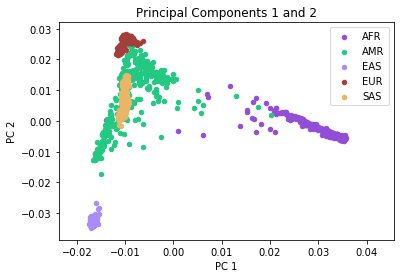

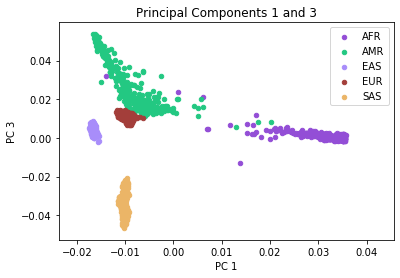

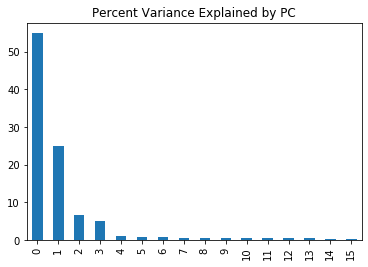

In [24]:
plot_from_pca(pca_file_name, pop_df)

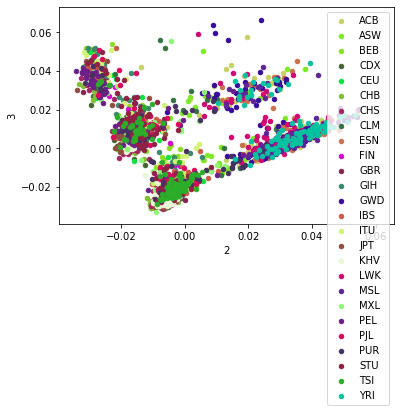

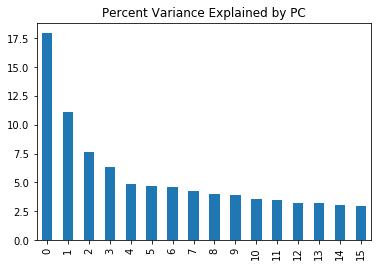

In [60]:
plot_from_pca("../data/pca/filtered_chr22_test.vcf.gz_pca", pop_df)

In [18]:
directory = '/datasets/dsc180a-wi20-public/Genome/vcf/'
out_path = '../data/vcf/'
fp = 'ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
cmd = 'vcftools --gzvcf '+directory + fp +' --freq2 --out '+out_path+' --max-alleles 2'
# cmd = 'bcftools stats ' +directory+fp
# run_process('bcftools')


## Merge VCF

In [28]:
directory = '../data/vcf/'

file_list=['filt_ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr3.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr4.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr5.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr6.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr7.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr8.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr9.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr10.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr11.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr12.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr13.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr14.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr15.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr16.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr17.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr18.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr19.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr21.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf',
          'filt_ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf']
out_path='../data/vcf/'
merge_vcf(file_list, directory, out_path)

bcftools concat ../data/vcf/filt_ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr3.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr4.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr5.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr6.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr7.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr8.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr9.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr10.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr11.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.vcf ../data/vcf/filt_ALL.chr12.shapeit2_integrated_v1a.GRCh38.

'../data/vcf/22_merged.vcf'

In [149]:
# MERGE


f1 = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
f2 = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'

cmd = 'vcf-concat ' +f1 + ' '  +f2+' | gzip -c > out.vcf.gz'
run_process(cmd)

KeyboardInterrupt: 

## File Conversion FastQ->BAM->VCF

In [22]:
def index_bwa(ref, name_idx):
    ''' name_idx = 'refhg38'
    '''
    run_process('bwa index -p ' name_idx ' -a bwtsw ' + ref)
    print('done indexing reference')

def fa_to_sam(fp1, fp2, ref, refname, outpath, index=0,header=0):
    """ http://bioinformatics-core-shared-training.github.io/cruk-bioinf-sschool/Day1/Sequence%20Alignment_July2015_ShamithSamarajiwa.pdf
        refname: nickname after indexing the ref file
    """
    if index = 1: # set refrence index
        index_bwa(ref, name_idx)
    space = ' '
    
    # 1000g is paired ends, use sampe
    cmd = 'bwa aln -t 4 ' + refname + ' ' + fp1 '> ' outpath + fp1 + ".sai"
    sai1 = outpath + fp1 + ".sai"
    
    cmd = 'bwa aln -t 4 ' + refname + ' ' + fp1 '> ' outpath + fp2 + ".sai"
    sai2 =outpath + fp2 + ".sai"
    
    cmd = 'bwa sampe '+ refname + space + sai1 + space + sai2 + space +fp1+space+fp2 +' > '+ outpath + fp1 + '.sam'
    
    return 1

def sam_to_bam(sam, ref,header=0):
    """if sam has header use header=1"""
    if header==0:
        cmd= ['samtools view -bT '+ ref+ ' ' sam+ ' > '+ sam +'.bam'] # when no header
    else:
        cmd= ['samtools view -bS '+ sam + ' > '+ sam +'.bam']
        
    run_process(cmd)
    run_process('samtools sort ' + sam +'.bam ' + sam +'_sorted.bam')
    return 1

def bam_to_vcf(bam, ref):
    """"TO DO"""
    run_process('samtools faidx ' + ref)
#     run_process('samtools mpileup -g -f ' + ref +' my-sorted1.bam my-sorted-2.bam my-sorted-n.bam > myraw.bcf')

In [34]:
run_process('bwa index -p refhg38 -a bwtsw ../test/*.fasta')

KeyboardInterrupt: 

In [27]:
def bam_to_vcf():
    
    return 1

In [35]:
# run_process('bcftools view ../test/chr22_test.vcf.gz')

In [6]:
# fp = "../test/chr22_test.vcf.gz" # HARD FILEPATH
# fp = 'filtered_chr22_test.vcf.gz'
# fp = 'out.vcf.gz'
fp= "../data/vcf/22_merged.vcf"

prunefp, filtered_vcf = prune_filter_vcf(fp, "../data/vcf/filtered/", fp.split('/')[-1])
print(prunefp,filtered_vcf)

pca_out_path = '../data/pca/'
pca_file_name = make_pca(fp, prunefp, pca_out_path, fp.split('/')[-1])
print(pca_file_name)
plot_from_pca(pca_file_name, pop_df)

../data/vcf/filtered/22_merged.vcf.prune.in ../data/vcf/filtered/filt_22_merged.vcf.vcf
../data/pca/22_merged.vcf_pca


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

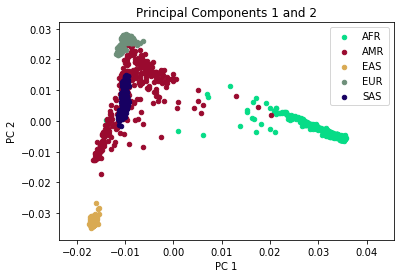

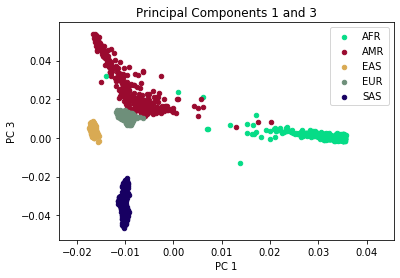

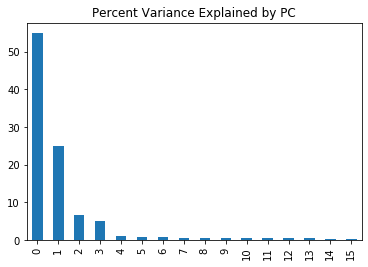

In [7]:
plot_from_pca(pca_file_name, pop_df)

In [57]:
pca_out_path = '../data/pca/'
pca_file_name = make_pca(fp, prunefp, pca_out_path, fp.split('/')[-1])
print(pca_file_name)


plink2 --vcf ../test/chr22_test.vcf.gz --extract ../data/vcf/filtered/chr22_test.vcf.gz.prune.in --make-bed --pca --out ../data/pca/chr22_test.vcf.gz_pca
hi
../data/pca/chr22_test.vcf.gz_pca


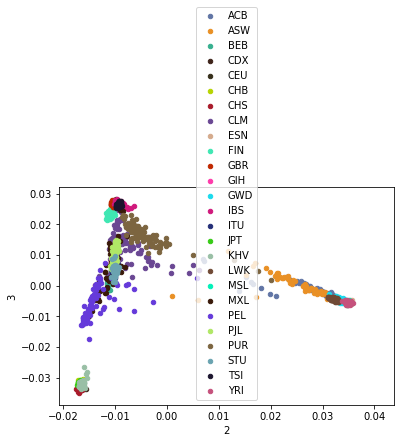

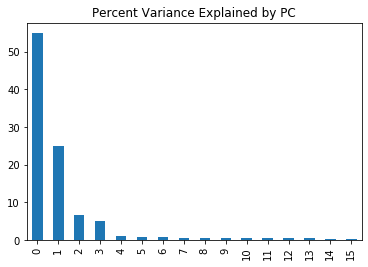

In [27]:
plot_from_pca("../data/pca/22_merged.vcf_pca", pop_df)

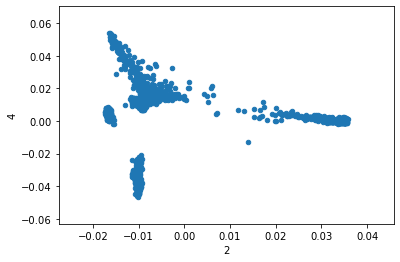

In [34]:
pd.read_csv('../data/pca/22_merged.vcf_pca.eigenvec', header=None, delimiter=' ').plot.scatter(x=2, y=4)

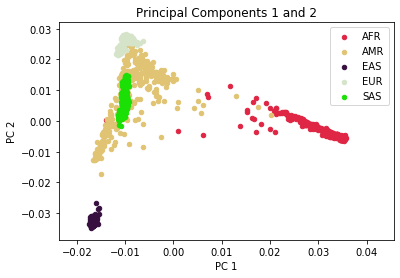

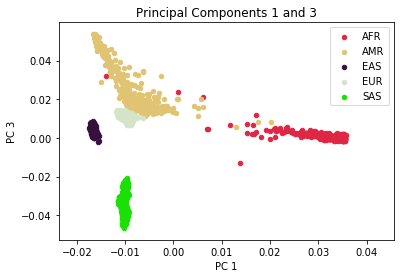

Text(0.5, 1.0, 'Percent Variance Explained by PC')

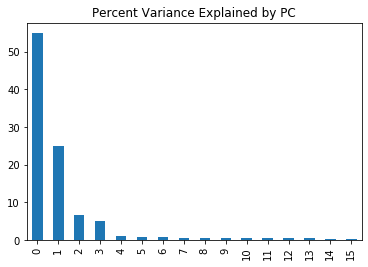

In [51]:
import matplotlib.pyplot as plt


pca_file_name = "../data/pca/22_merged.vcf_pca"
eigvec = pd.read_table(pca_file_name + ".eigenvec", delimiter=' ', header = None)
eigval = pd.read_table(pca_file_name + ".eigenval", delimiter=' ', header = None)

eigvec_wPop = pop_df.merge(eigvec, left_on='sample', right_on=0)

to_plot = eigvec_wPop.copy()
to_plot[0] = to_plot[0].apply(lambda x: x[:2])
to_plot[1] = to_plot[1].apply(lambda x: x[:2])

# ax = to_plot.plot.scatter(x=2, y=3, label='pop',legend=False)

import colorsys

N = 26
# HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
# RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

# colors = list(RGB_tuples)
from random import randint

colors=[]
for i in range(N):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

colors = dict(zip(list(to_plot['super_pop'].unique()), colors))
###
_, ax = plt.subplots()
for key,group in to_plot.groupby('super_pop'):
    group.plot.scatter(ax=ax, x=2, y=3, label=key, color = colors[key]);
    ax.set_title('Principal Components 1 and 2')
    ax.set_ylabel('PC 2')
    ax.set_xlabel('PC 1')

plt.show()


_, ax = plt.subplots()
for key,group in to_plot.groupby('super_pop'):
    group.plot.scatter(ax=ax, x=2, y=4, label=key, color = colors[key]);
    ax.set_title('Principal Components 1 and 3')
    ax.set_ylabel('PC 3')
    ax.set_xlabel('PC 1')

###
plt.show()


ax.legend()



perc_var = (eigval[:16])/eigval[0].sum()*100

ax2 = perc_var.plot(kind='bar', legend=False)
ax2.set_title('Percent Variance Explained by PC')

In [59]:
fp = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
f[]
out_path = "../data/vcf/filtered/"
out_prefix = 'chr22filtered'
prune_filter_vcf(fp, out_path, out_prefix)

b'PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2'
b'(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3'
b'Logging to chr22filtered.log.'
b'Options in effect:'
b'--indep-pairwise 50 10 0.1'
b'--maf 0.05'
b'--out chr22filtered'
b'--vcf /datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b''
b'385411 MB RAM detected; reserving 192705 MB for main workspace.'
b'--vcf: 1k variants complete.\r--vcf: 2k variants complete.\r--vcf: 3k variants complete.\r--vcf: 4k variants complete.\r--vcf: 5k variants complete.\r--vcf: 6k variants complete.\r--vcf: 7k variants complete.\r--vcf: 8k variants complete.\r--vcf: 9k variants complete.\r--vcf: 10k variants complete.\r--vcf: 11k variants complete.\r--vcf: 12k variants complete.\r--vcf: 13k variants complete.\r--vcf: 14k variants complete.\r--vcf: 15k variants complete.\r--vcf: 16k variants complete.\r--vcf: 17k variants complete.\r--vcf: 18

In [122]:
check_files = ['cd /datasets/dsc180a-wi20-public/Genome/vcf/sample; ls']

copy_test_file = "cp /datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz* ~/'DSC180A Project'/data/vcf/"

# vcf_to_bcf = '''for chr in {1..22}; do
#     bcftools norm -m-any --check-ref w -f human_g1k_v37.fasta \
#       ALL.chr'${chr}'.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz | \

#       bcftools annotate -x ID -I +'%CHROM:%POS:%REF:%ALT' | \

#         bcftools norm -Ob --rm-dup both \
#           > ALL.chr'${chr}'.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.bcf ;

#     bcftools index ALL.chr'${chr}'.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.bcf ;
# done'''


fp = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
out_path = 'chr22'

# ['gatk', 'FilterVcf', '--INPUT', 'data/temp/merged.vcf', '--OUTPUT', 'data/temp/filtered.vcf']


args1 = ["cd ~/'DSC180A Project'/data/vcf/filtered/; plink2 --vcf " + fp + " --maf " + MAF + " --indep-pairwise 50 10 0.1 --out "+ out_path]

# prune_fp = './vcf/filtered/chr22.prune.in'

# outdir = 'chr22pc'

# args2 = ['plink2', '--vcf', fp, '--extract', prune_fp, '--make-bed', '--pca', '--out', outdir]

# run_process(check_files)
# run_process(copy_test_file)
run_process(check_files)

b'chr22_test.vcf.gz'


['chr22_test.vcf.gz']

In [ ]:
# vcf_list = 'cd /datasets/dsc180a-wi20-public/Genome/vcf; ls'

# # get all dataset chromosome vcf's to merge
# vcf_files = run_process(vcf_list)
# vcf_files = ['/datasets/dsc180a-wi20-public/Genome/vcf/' + s for s in vcf_files]

# vcf_files = [i for i in vcf_files if (('vcf.gz' in i) & ('.tbi' not in i))] 


# for filename in vcf_files:
#     pop_list_command = "cd ~/'DSC180A Project'/data/vcf/filtered/; echo "+ filename + " >> toMerge.list"
#     run_process(pop_list_command)
    
# # "cd /datasets/dsc180a-wi20-public/Genome/vcf; find . -name '*.vcf.gz' | grep -e 'Pruned' > ForMerge.list ;"

# # args21 = "cd ~/'DSC180A Project'/data/vcf/filtered/; gatk MergeVcfs --INPUT -I toMerge.list --OUTPUT data/vcf/merged.vcf"
# args21 = "gatk MergeVcfs --INPUT ~/'DSC180A Project'/data/vcf/filtered/toMerge.list --OUTPUT output_variants.vcf.gz"

# # have to delete tomerge.list before running

In [58]:
# args21 = "gatk MergeVcfs -I ~/'DSC180A Project'/data/vcf/ALL.chr21.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf \
# -I ~/'DSC180A Project'/data/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf \
# --OUTPUT output_variants.vcf"
# run_process(args21)

In [32]:
# eigval = pd.read_table('chr22pc.eigenval', header = None)
# eigval.head()

In [99]:
pca_file_name

"~/'DSC180A Project'/data/pca/chr22filtered_pca"

In [68]:
prune = "~/'DSC180A Project'/data/vcf/filtered/chr22filtered"

fp = '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
fp = "~/'DSC180A Project'/data/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz"
pca_out_path = "~/'DSC180A Project'/data/pca/"

out_path = "~/'DSC180A Project'/data/vcf/filtered/"
out_prefix = 'chr22filtered'
MAF = '0.1'

# cmd = ['plink2', '--vcf', fp, '--extract', prune_fp, '--make-bed', '--pca', '--out', outdir]
pca_file_name = pca_out_path + out_prefix + '_pca'
cmd = 'plink2 --vcf ' + fp + ' --extract ' + out_path + out_prefix + '.prune.in --make-bed --pca --out ' + pca_file_name

run_process(cmd)




b'PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2'
b'(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3'
b'Logging to /home/psheurpu/DSC180A Project/data/pca/chr22filtered_pca.log.'
b'Options in effect:'
b'--extract /home/psheurpu/DSC180A Project/data/vcf/filtered/chr22filtered.prune.in'
b'--make-bed'
b'--out /home/psheurpu/DSC180A Project/data/pca/chr22filtered_pca'
b'--pca'
b'--vcf /home/psheurpu/DSC180A Project/data/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b''
b'385411 MB RAM detected; reserving 192705 MB for main workspace.'
b'--vcf: 1k variants complete.\r--vcf: 2k variants complete.\r--vcf: 3k variants complete.\r--vcf: 4k variants complete.\r--vcf: 5k variants complete.\r--vcf: 6k variants complete.\r--vcf: 7k variants complete.\r--vcf: 8k variants complete.\r--vcf: 9k variants complete.\r--vcf: 10k variants complete.\r--vcf: 11k variants complete.\r--vcf: 12k variants complete.\r--vcf: 13k va

['PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2',
 '(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3',
 'Logging to /home/psheurpu/DSC180A Project/data/pca/chr22filtered_pca.log.',
 'Options in effect:',
 '--extract /home/psheurpu/DSC180A Project/data/vcf/filtered/chr22filtered.prune.in',
 '--make-bed',
 '--out /home/psheurpu/DSC180A Project/data/pca/chr22filtered_pca',
 '--pca',
 '--vcf /home/psheurpu/DSC180A Project/data/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
 '',
 '385411 MB RAM detected; reserving 192705 MB for main workspace.',
 '--vcf: 1k variants complete.\r--vcf: 2k variants complete.\r--vcf: 3k variants complete.\r--vcf: 4k variants complete.\r--vcf: 5k variants complete.\r--vcf: 6k variants complete.\r--vcf: 7k variants complete.\r--vcf: 8k variants complete.\r--vcf: 9k variants complete.\r--vcf: 10k variants complete.\r--vcf: 11k variants complete.\r--vcf: 12k variants complete.\r--

Text(0.5, 1.0, 'Histogram of Super Population Counts')

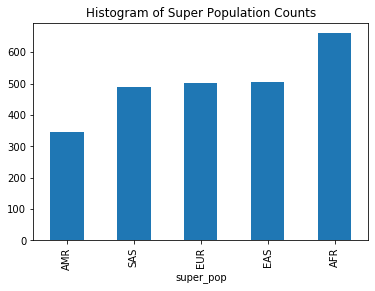

In [54]:
to_plot.groupby('super_pop').count()['sample'].sort_values().plot(kind='bar')
plt.title('Histogram of Super Population Counts')

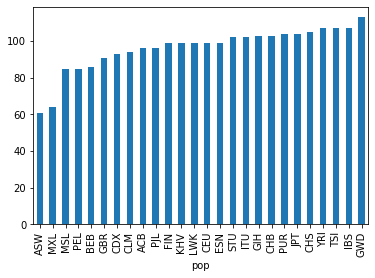

In [132]:
to_plot.groupby('pop').count()['sample'].sort_values().plot(kind='bar')

In [111]:
pca_file_name

"~/'DSC180A Project'/data/pca/chr22filtered_pca"

In [6]:
pop_df = pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel', delimiter='\t').drop(columns=['Unnamed: 4', 'Unnamed: 5'])

plot_from_pca("../data/pca/chr22filtered_pca", pop_df)

FileNotFoundError: [Errno 2] File b'../data/pca/chr22filtered_pca.eigenvec' does not exist: b'../data/pca/chr22filtered_pca.eigenvec'

In [7]:
plot_from_pca("../data/pca/out.vcf.gz_pca", pop_df)

FileNotFoundError: [Errno 2] File b'../data/pca/out.vcf.gz_pca.eigenvec' does not exist: b'../data/pca/out.vcf.gz_pca.eigenvec'

In [97]:
run_process("cd ~/'DSC180A Project'/data/pca; ls")

b'chr22filtered_pca.bed'
b'chr22filtered_pca.bim'
b'chr22filtered_pca.eigenval'
b'chr22filtered_pca.eigenvec'
b'chr22filtered_pca.fam'
b'chr22filtered_pca.log'
b'chr22filtered_pca.nosex'


['chr22filtered_pca.bed',
 'chr22filtered_pca.bim',
 'chr22filtered_pca.eigenval',
 'chr22filtered_pca.eigenvec',
 'chr22filtered_pca.fam',
 'chr22filtered_pca.log',
 'chr22filtered_pca.nosex']

In [8]:

eigvec = pd.read_table("../data/pca/chr22filtered_pca.eigenvec", delimiter=' ', header = None)

eigval = pd.read_table("../data/pca/chr22filtered_pca.eigenval", delimiter=' ', header = None)

to_plot = eigvec.copy()
to_plot[0] = to_plot[0].apply(lambda x: x[:2])
to_plot[1] = to_plot[1].apply(lambda x: x[:2])

ax = to_plot.plot.scatter(x=2, y=3, label='0', legend=False)


ax.set_ylabel('PC 2')
ax.set_xlabel('PC 1')

perc_var = (eigval[:16])/eigval[0].sum()*100

ax2 = perc_var.plot(kind='bar', legend=False)
ax2.set_title('Percent Variance Explained by PC')

FileNotFoundError: [Errno 2] File b'../data/pca/chr22filtered_pca.eigenvec' does not exist: b'../data/pca/chr22filtered_pca.eigenvec'

Text(0.5, 1.0, 'Percent Variance Explained by PC')

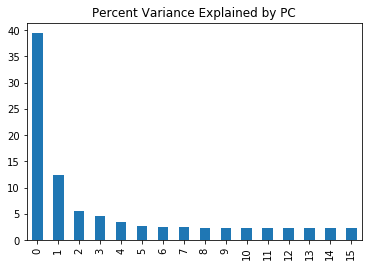

In [37]:
def main(targets):
    # grab small amount of data
    if 'data-test' in targets:
        fp = './test/chr22_test.vcf.gz'
        
    # make the data target
    if 'data' in targets:
#         cfg = load_params(DATA_PARAMS)
#         get_data(**cfg)

    # process and run data analysis
    if 'process' in targets:
        shutil.rmtree('data/temp',ignore_errors=True)
        shutil.rmtree('data/out',ignore_errors=True)
        shutil.rmtree('data/test',ignore_errors=True)

    

    return


# if __name__ == '__main__':
#     targets = sys.argv[1:]
#     main(targets)

In [155]:
check = str(Path.home()) + "/DSC180A Project/Genome Project/data/pca"
check

'/home/psheurpu/DSC180A Project/Genome Project/data/pca'

In [193]:
os.getcwd()

'/home/psheurpu/DSC180A Project/Genome Project/notebooks'

In [178]:
prunefp

"~/'DSC180A Project'/'Genome Project'/data/vcf/filtered/chr22_test.vcf.gz.prune.in"

'/home/psheurpu/DSC180A Project/Genome Project'

In [123]:
os.getcwd()

'/home/psheurpu/DSC180A Project/Genome Project/notebooks'

In [115]:
to_cd = '/'.join(pca_file_name.split('/')[:-1])
cmd = "cd " + to_cd + "; ls"
    
run_process(cmd)

b'chr22filtered_pca.bed'
b'chr22filtered_pca.bim'
b'chr22filtered_pca.eigenval'
b'chr22filtered_pca.eigenvec'
b'chr22filtered_pca.fam'
b'chr22filtered_pca.log'
b'chr22filtered_pca.nosex'
b'chr22_test.vcf.gz_pca.bed'
b'chr22_test.vcf.gz_pca.bim'
b'chr22_test.vcf.gz_pca.eigenval'
b'chr22_test.vcf.gz_pca.eigenvec'
b'chr22_test.vcf.gz_pca.fam'
b'chr22_test.vcf.gz_pca.log'
b'chr22_test.vcf.gz_pca.nosex'


['chr22filtered_pca.bed',
 'chr22filtered_pca.bim',
 'chr22filtered_pca.eigenval',
 'chr22filtered_pca.eigenvec',
 'chr22filtered_pca.fam',
 'chr22filtered_pca.log',
 'chr22filtered_pca.nosex',
 'chr22_test.vcf.gz_pca.bed',
 'chr22_test.vcf.gz_pca.bim',
 'chr22_test.vcf.gz_pca.eigenval',
 'chr22_test.vcf.gz_pca.eigenvec',
 'chr22_test.vcf.gz_pca.fam',
 'chr22_test.vcf.gz_pca.log',
 'chr22_test.vcf.gz_pca.nosex']

In [44]:
os.path.exists('etl.ipynb')

True

In [43]:
run_process('ls')

b'etl.ipynb'
b'plink.log'
b'vcf filter.ipynb'


['etl.ipynb', 'plink.log', 'vcf filter.ipynb']

In [114]:
path = "DSC180A Project/Genome Project/data/pca"
def cd(path):
    os.chdir(os.path.expanduser(path))
cd(path)

FileNotFoundError: [Errno 2] No such file or directory: 'DSC180A Project/Genome Project/data/pca'

In [53]:
os.path.expanduser(path)

NameError: name 'path' is not defined

In [61]:
from pathlib import Path
home = str(Path.home())
home

'/home/psheurpu'

In [78]:
os.chdir("notebooks")

In [79]:
os.getcwd()

'/home/psheurpu/DSC180A Project/Genome Project/notebooks'